In [110]:
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import functools

In [111]:
csvs = ["threads","fastflow","fastflow_blocking","fastflow_blocking_no_map","threads_pinned","omp"]
#df = pd.concat([pd.read_csv(f"../data/{csv}A.csv") for csv in csvs]).reset_index()

df = pd.concat([
        pd.read_csv("../data/threadsA.csv"),
        pd.read_csv("../data/fastflowA.csv"),
        pd.read_csv("../data/fastflow_blockingA.csv"),
        pd.read_csv("../data/fastflow_blocking_no_mapA.csv"),
        pd.read_csv("../data/threads_pinnedA.csv"),
        pd.read_csv("../data/omp4.csv")
        ]).reset_index()
sequentials = pd.read_csv("../data/sequentialA.csv").reset_index()

In [112]:
df = df[df['nworkers'] >= 2]
df['nworkers'] -= 1

programs = df['name'].unique()
all_n_workers = df['nworkers'].unique()
filenames = df['filename'].unique()

def crop_slash(e): return e.split('/')[1].split('.')[0]

In [113]:
sequentials['read_time'] = [9289,2636,1104]
sequentials['init_time'] = [173849,62852,35543]
sequentials['total_time'] = [56640000,8810000,2160000]
sequentials['processing_time'] = [72291,25126,9525]
sequentials['frames'] = [812,431,227]


# Speedup

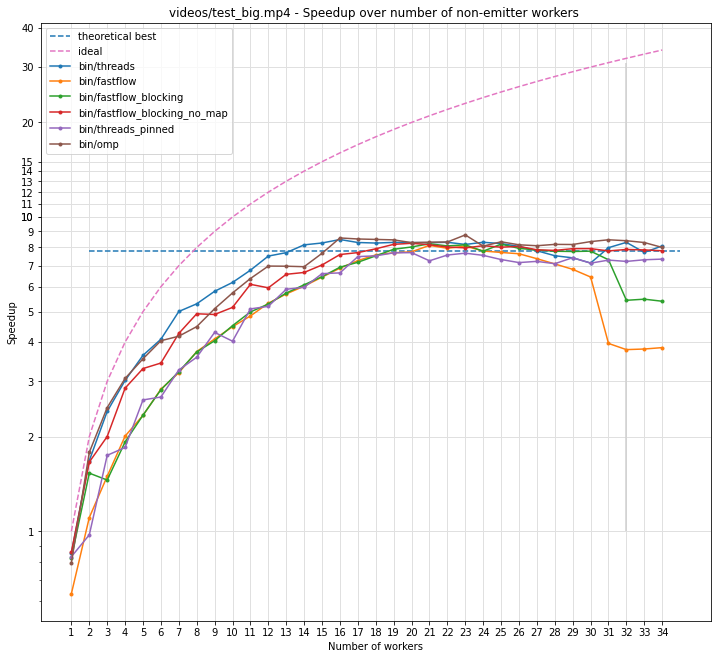

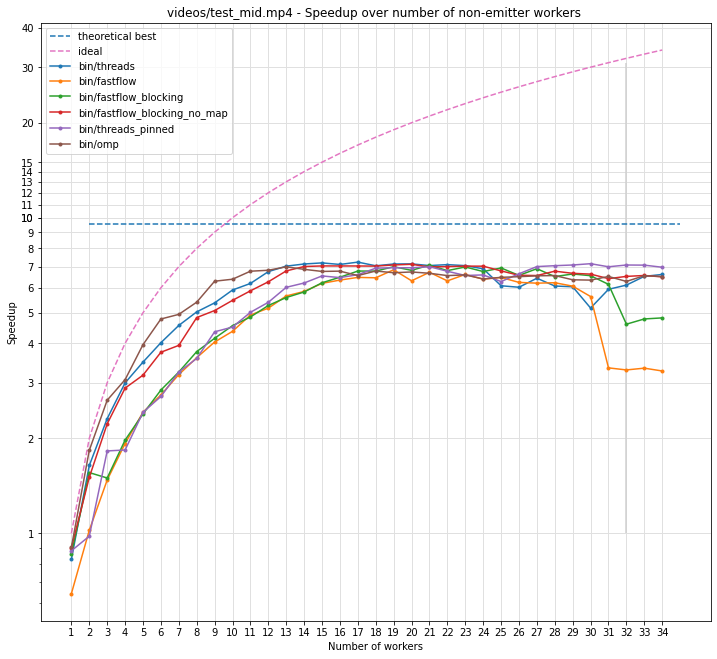

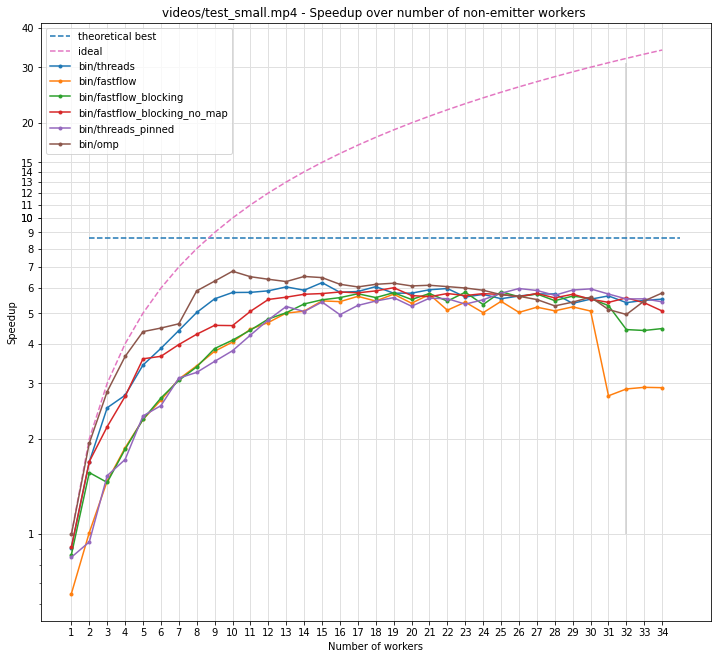

In [114]:
for f in filenames:
    plt.gcf().set_size_inches(12, 11) 
    def seq(n): return sequentials[sequentials['filename'] == f][n].values[0]
    for p in programs:
        y = seq('avg') / df[(df['name'] == p) & (df['filename'] == f)]['avg']
        plt.errorbar(all_n_workers, y, label=p, marker='.')
    plt.grid(color='#e0e0e0', linestyle='-', linewidth=1)
    plt.yscale('log')
    plt.yticks(list(range(0,16,1)) + list(range(10,100,10)))
    plt.gca().get_yaxis().set_major_formatter(mplt.ticker.ScalarFormatter())
    plt.gca().get_yaxis().get_major_formatter().labelOnlyBase = False
    plt.vlines(32, ymin=1, ymax=31, color='#d0d0d0', linestyle='-')
    plt.hlines(seq('processing_time')/seq('read_time'), xmin=2, xmax=35, linestyle='--',label='theoretical best')

    plt.plot(all_n_workers, all_n_workers, '--', label='ideal')
    plt.xticks(all_n_workers)

    plt.legend()
    plt.ylabel("Speedup")
    plt.xlabel("Number of workers")
    plt.title(f"{f} - Speedup over number of non-emitter workers ")
    plt.savefig(f'speedup_{crop_slash(f)}.svg')  
    plt.show()

# Completion time

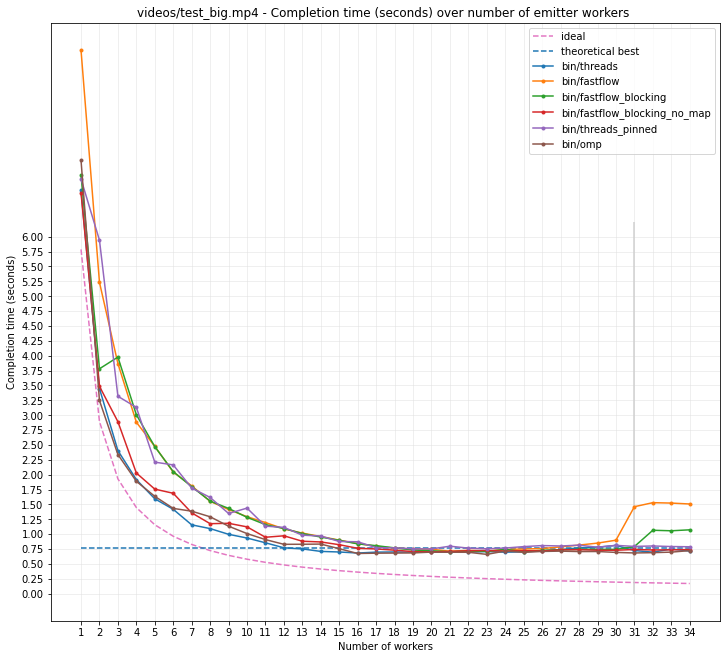

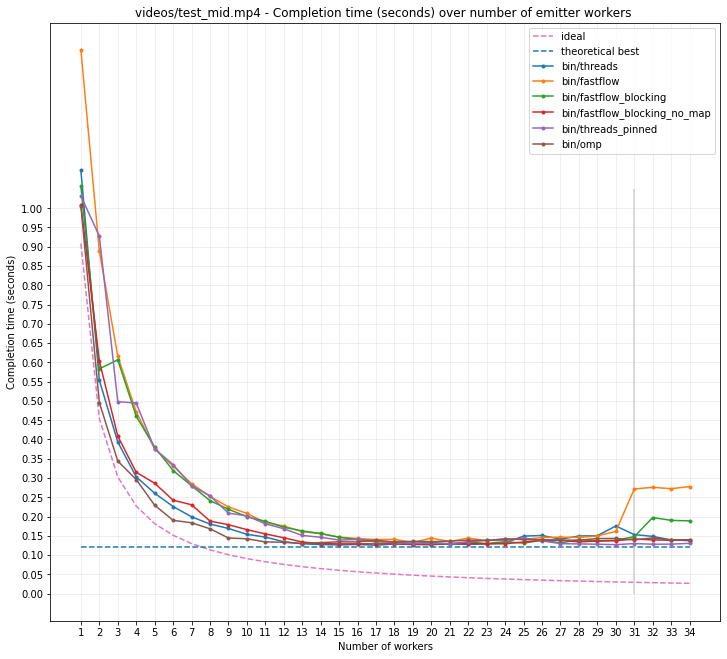

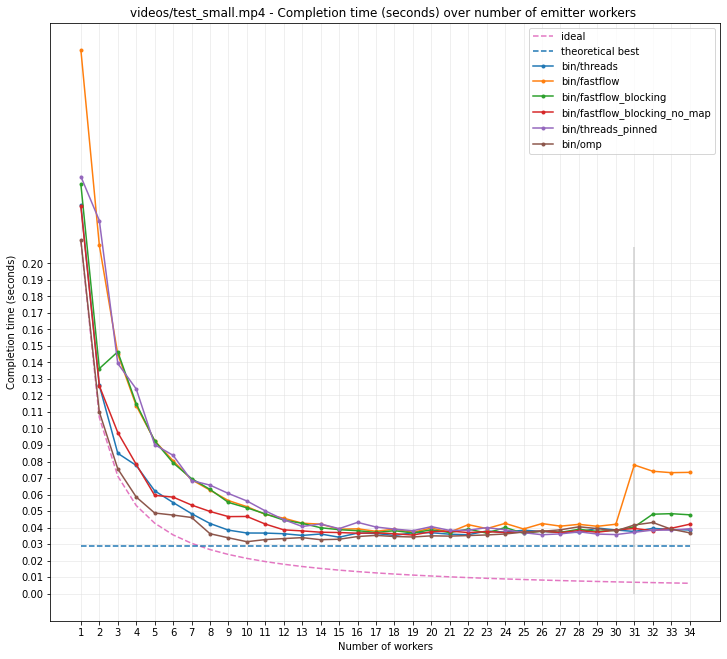

In [115]:
for f in filenames:
    plt.gcf().set_size_inches(12, 11) 
    seq_time = sequentials[sequentials['filename'] == f]['avg'].values[0]
    for p in programs:
        y = df[(df['name'] == p) & (df['filename'] == f)]['avg']
        #e = df[(df['name'] == p) & (df['filename'] == f)]['std']
        plt.errorbar(all_n_workers, y/1e7, label=p, marker='.') #yerr=e/1e7, label=p, marker='.')
    plt.grid(color='#e0e0e0', linestyle='-', linewidth=0.5)
    plt.plot(all_n_workers, seq_time/1e7/all_n_workers, '--', label='ideal')
    plt.xticks(all_n_workers)
    
    plt.hlines((seq('read_time')*seq('frames')+seq('init_time'))/1e7, xmin=1, xmax=34, linestyle='--',label='theoretical best')
    
    if f == 'videos/test_big.mp4':
        plt.yticks([x*0.25 for x in range(0,25,1)])
        plt.vlines(31, ymin=0, ymax=25*0.25, color='#d0d0d0', linestyle='-')
    if f == 'videos/test_mid.mp4':
        plt.yticks([x*0.05 for x in range(0,21,1)])
        plt.vlines(31, ymin=0, ymax=21*0.05, color='#d0d0d0', linestyle='-')
    if f == 'videos/test_small.mp4':
        plt.yticks([x*0.01 for x in range(0,21,1)])
        plt.vlines(31, ymin=0, ymax=21*0.01, color='#d0d0d0', linestyle='-')

    plt.legend()
    plt.ylabel("Completion time (seconds)")
    plt.xlabel("Number of workers")
    plt.title(f"{f} - Completion time (seconds) over number of emitter workers ")
    plt.savefig(f'completion_time_{crop_slash(f)}.svg')  
    plt.show()

# Efficiency

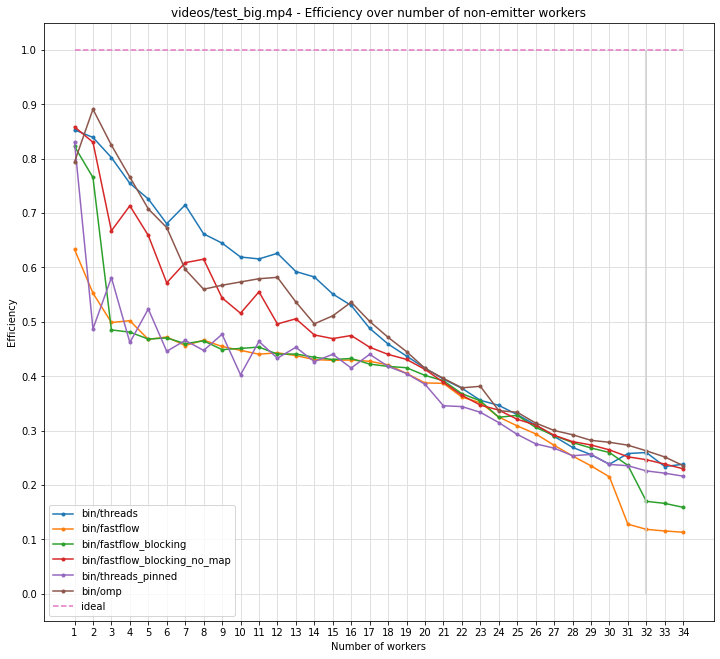

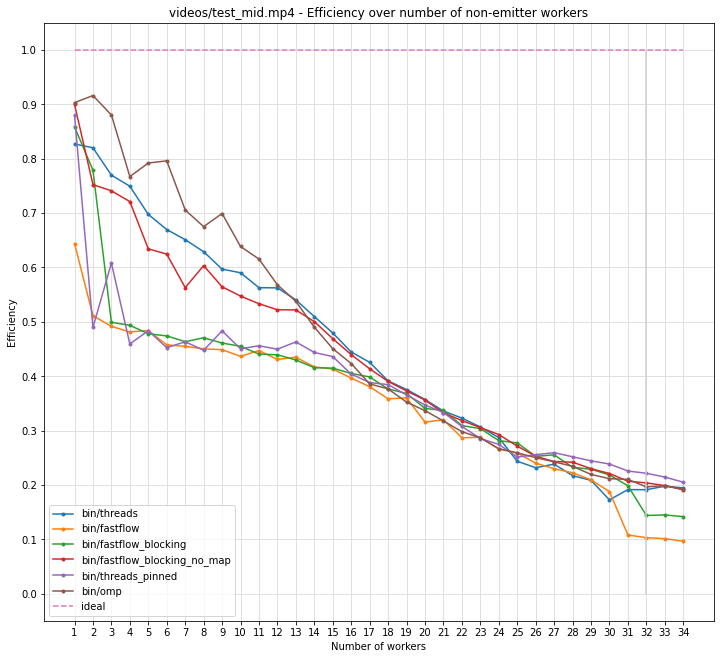

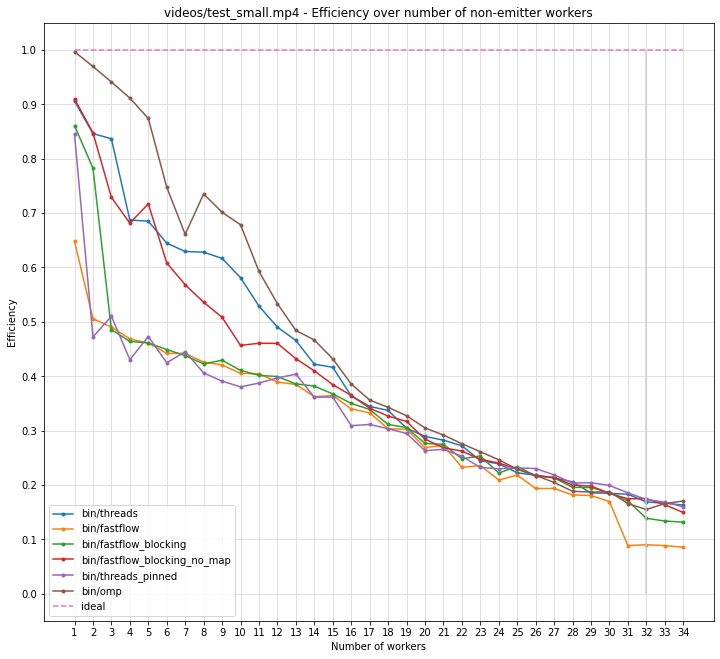

In [119]:
for f in filenames:
    plt.gcf().set_size_inches(12, 11) 
    seq_time = sequentials[sequentials['filename'] == f]['avg'].values[0]
    for p in programs:
        y = (seq_time / all_n_workers) / df[(df['name'] == p) & (df['filename'] == f)]['avg']
        plt.plot(all_n_workers, y, label=p, marker='.')
    plt.grid(color='#e0e0e0', linestyle='-', linewidth=1)
    plt.yticks([x*0.1 for x in range(0,11,1)])
    plt.gca().get_yaxis().set_major_formatter(mplt.ticker.ScalarFormatter())
    plt.gca().get_yaxis().get_major_formatter().labelOnlyBase = False
    plt.vlines(32, ymin=0, ymax=1, color='#d0d0d0', linestyle='-')

    plt.plot(all_n_workers, all_n_workers * 0 + 1, '--', label='ideal')
    plt.xticks(all_n_workers)

    plt.legend()
    plt.ylabel("Efficiency")
    plt.xlabel("Number of workers")
    plt.title(f"{f} - Efficiency over number of non-emitter workers")
    plt.savefig(f'efficiency_{crop_slash(f)}.svg')  
    plt.show()